In [2]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt
import numpy as np

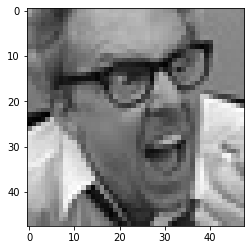

In [25]:
img_array=cv2.imread("dataSet/Training/0/Training_3908.jpg")
img_array.shape
#so it has 3 channel since its rgb
plt.imshow(img_array)

In [20]:
#so it has 3 channel since its rgb

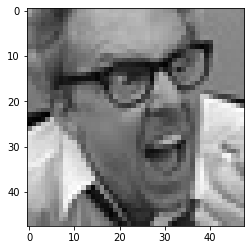

In [21]:
plt.imshow(img_array)

In [26]:
dataDirectory="dataSet/Training/" ##Training dataset

In [27]:
Classes=["0","1","2","3","4","5","6"] ##List of Classes

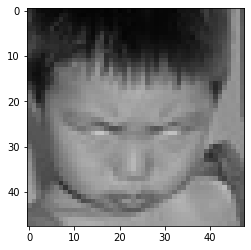

In [28]:
for category in Classes:
    path=os.path.join(dataDirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

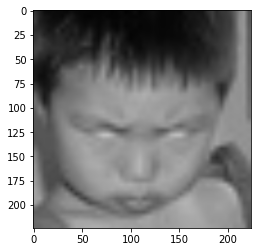

In [29]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [30]:
new_array.shape ##  since iam using transfer learning so for transfer learning if i want to use any deepleaning classifiyer it use 224x224 images

(224, 224, 3)

In [31]:
training_Data=[] ## data array

def create_training_Data():
    for category in Classes:
        path=os.path.join(dataDirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass
           

In [11]:
create_training_Data()

In [12]:
import random
random.shuffle(training_Data)
training_Data=training_Data[0:10000]

In [13]:
X = [] ## data/feature
y = [] ## label

for features,label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,img_size,img_size,3) ## converting it to 4 dimension 
## actually for mobile net since using deeplearning architechture such as mobile net which takes in 4 dimensional because it also contains depth wise convolutional neural network

In [14]:
print(X.shape)


(10000, 224, 224, 3)


In [15]:
#normalize the data
X = X/255 ## normalizing the data here

In [16]:
Y = np.array(y)

In [17]:
Y.shape

(10000,)

In [ ]:
# Deep Learning model for training - Transfer Learning

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
model = tf.keras.applications.MobileNetV2() #Pre-trained Model

In [20]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

## Model: mobilenetv2_1.00_224
## Total params: 3,538,984
## Trainable params: 3,504,872
## Non-trainable params: 34,112
## Prediction Classes : 1000


In [ ]:
# Transfer Learning - Tuning , weights will start from last check point

In [21]:
base_input=model.layers[0].input ## input

In [22]:
base_output=model.layers[-2].output #-2 and not -1 because i just need the output of the base output

In [23]:
base_output

<tf.Tensor 'global_average_pooling2d/Mean:0' shape=(None, 1280) dtype=float32>

In [24]:
final_output=layers.Dense(128)(base_output) ## adding new layer after the ouput of global pooling layer
final_output= layers.Activation('relu')(final_output) ## activation function
final_output=layers.Dense(64)(final_output)
final_output= layers.Activation('relu')(final_output) ## activation function
final_output=layers.Dense(7,activation='softmax')(final_output) ## since my classes are 7 and this is classification layer 



In [25]:
base_output

<tf.Tensor 'global_average_pooling2d/Mean:0' shape=(None, 1280) dtype=float32>

In [26]:
final_output

<tf.Tensor 'dense_2/Softmax:0' shape=(None, 7) dtype=float32>

In [27]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [28]:
new_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [29]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [30]:
new_model.fit(X,Y,epochs=20)

Epoch 1/20
313/313 [==============================] - 1127s 4s/step - loss: 1.3812 - accuracy: 0.4721
Epoch 2/20
313/313 [==============================] - 1028s 3s/step - loss: 1.1736 - accuracy: 0.5600
Epoch 3/20
313/313 [==============================] - 1026s 3s/step - loss: 1.0722 - accuracy: 0.5963
Epoch 4/20
313/313 [==============================] - 1026s 3s/step - loss: 0.9838 - accuracy: 0.6324
Epoch 5/20
313/313 [==============================] - 1027s 3s/step - loss: 0.9282 - accuracy: 0.6560
Epoch 6/20
313/313 [==============================] - 1025s 3s/step - loss: 0.8532 - accuracy: 0.6877
Epoch 7/20
313/313 [==============================] - 1029s 3s/step - loss: 0.8058 - accuracy: 0.7018
Epoch 8/20
313/313 [==============================] - 1025s 3s/step - loss: 0.7404 - accuracy: 0.7305
Epoch 9/20
313/313 [==============================] - 1025s 3s/step - loss: 0.6767 - accuracy: 0.7584
Epoch 10/20
313/313 [==============================] - 1027s 3s/step - loss: 0.608

In [31]:
new_model.save('my_model_3.h5')

In [ ]:
#Using already trained weights for face detection algorithms
# basically it works only on grey images so we need to convert rgb to grey images

In [20]:
frame = cv2.imread("sad.jpg")

In [21]:
frame.shape

(549, 732, 3)

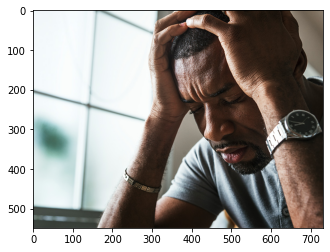

In [22]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

## we need face detection here to crop just to the face

# we use harcasacde which have already trained weights for the face detection

In [23]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [24]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [25]:
gray.shape

(549, 732)

In [26]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h, x:x+w] 
    roi_color= frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2) 
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

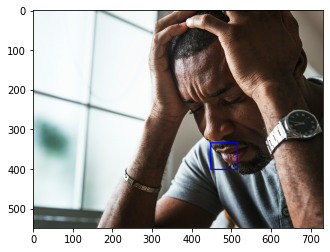

In [27]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

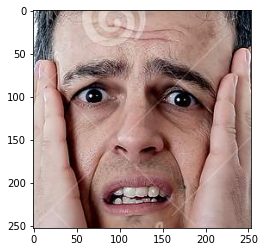

In [15]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [16]:
final_image=cv2.resize(face_roi,(224,224)) ## resizing
final_image=np.expand_dims(final_image,axis=0) ## adding forth dimension
final_image=final_image/255.0 ## normalizing it

In [17]:
predictions=new_model.predict(final_image)

In [18]:
predictions[0]

array([7.9799914e-01, 3.8752530e-03, 1.1929629e-01, 6.2442277e-02,
       4.4693734e-05, 2.0872024e-04, 1.6133539e-02], dtype=float32)

In [19]:
np.argmax(predictions)

0

In [14]:
face_roi=[]
import cv2 ### pip install opencv-python
#from deepface import DeepFace ## pip install deepface 
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# set the rectangle background to white
rectangle_bgr = (255, 255, 255) #make a black image
img = np.zeros((500, 500))
# set some text
text = "Some text in a box!"
# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
# set the text start position
text_offset_x = 10
text_offset_y=img.shape[0] - 25
# make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y- text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED) 
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
cap= cv2.VideoCapture (0)
# Check if the webcam is opened correctly

if not cap.isOpened():
    cap=cv2.VideoCapture (0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray =gray[y:y+h, x:x+w]
        roi_color= frame [y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew]
    if(face_roi!=[]):
        final_image = cv2.resize(face_roi, (224, 224))
        final_image = np.expand_dims(final_image, axis=0)
        final_image=final_image/255.0
        font = cv2.FONT_HERSHEY_SIMPLEX
        Predictions = new_model.predict (final_image)
        font_scale = 1.5
        font = cv2.FONT_HERSHEY_PLAIN

        if (np.argmax(Predictions) == 0):
            status = "Angry"
            x1, y1,w1, h1 = 0,0,175,75
            # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
            # Add text
            cv2.putText(frame, status, (x1 + int (w1/10),y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        elif (np.argmax(Predictions) == 1):
            status = "Disgust"
            x1, y1,w1,h1 = 0,0,175,75
            # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1+ w1, y1+ h1), (0,0,0), -1)
            # Add text
            cv2.putText(frame, status, (x1 + int (w1/10), y1 + int (h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
            cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2,cv2.LINE_4)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

        elif (np.argmax (Predictions) == 2):
            status = "Fear"
            x1, y1,w1,h1 = 0,0,175,75
            # Draw black background rectangle 
            cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
            # Add text
            cv2.putText(frame, status, (x1 + int(w1/10), y1+ int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
            cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255),1)

        elif (np.argmax (Predictions) == 3):
            status = "Happy"
            x1, y1,w1, h1 = 0,0,175,75 # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1+ w1, y1+ h1), (0,0,0), -1)
            # Add text
            cv2.putText(frame, status, (x1+ int(w1/10), y1+ int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
            cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
        elif (np.argmax (Predictions) == 4): 
            status = "Neutral"
            x1, y1,w1,h1 = 0,0,175,75 # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
            # Add text
            cv2.putText(frame, status, (x1 + int (w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
            cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

        elif (np.argmax (Predictions) == 5):
            status = "Sad"
            x1, y1,w1, h1 = 0,0,175,75
            # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
            # Add text
            cv2.putText(frame, status, (x1+ int (w1/10), y1+ int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
            cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        else:
            status = "Suprise"
            x1, y1,w1,h1 = 0,0,175,75 # Draw black background rectangle
            cv2.rectangle (frame, (x1, x1), (x1+ w1, y1+h1), (0,0,0), -1)
            # Add text
            cv2.putText(frame, status, (x1 + int (w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7, (0,255,0), 2) 
            cv2.putText(frame, status, (100, 150), font, 3, (0, 255,0),2, cv2.LINE_4)       
            #cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    cv2.imshow('Face Emotion Recognition',frame)
    if(cv2.waitKey(2) & 0xFF ==ord('q')):
        break
cap.release()
cv2.destroyAllWindows()


Face not detected
Face not detected
Face not detected
<ipython-input-14-acb8df23faf2>:45: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(face_roi!=[]):
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face no